In [124]:
import numpy as np
import pandas as pd
import networkx as nx
import traceback
import os
import matplotlib.pyplot as plt
import math

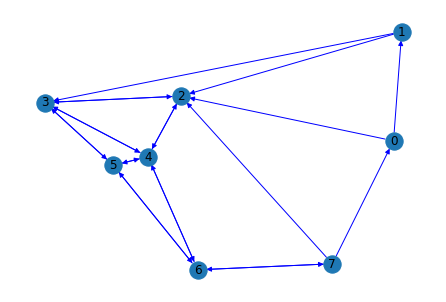

In [125]:
graphweights =  [[0.0, 4.0, 10.0 ,0.0, 0.0, 0.0, 0.0, 0.0],#1
                [0.0, 0.0, 11.0, 15.0, 0.0, 0.0, 0.0, 0.0],#2
                [0.0, 0.0, 0.0, 13.0, 3.0, 0.0, 0.0, 0.0],#3
                [0.0, 0.0, 13.0, 0.0, 6.0, 5.0, 0.0, 0.0],#4
                [0.0, 0.0, 3.0, 6.0, 0.0, 2.0, 5.0, 0.0],#5
                [0.0, 0.0, 0.0, 5.0, 2.0, 0.0, 8.0, 0.0],#6
                [0.0, 0.0, 0.0, 0.0, 5.0, 8.0, 0.0, 7.0],#7
                [5.0, 0.0, 11.0, 0.0, 0.0, 0.0, 7.0, 0.0]]


nodelabels = ["Tarnów", "Kępa", "Ostrów", "Łętowice", "Mikołajowice", "Rzeszów", "Dębno", "Gorlice"]

graph = nx.from_numpy_matrix(np.matrix(graphweights), create_using=nx.DiGraph)
nx.set_edge_attributes(graph,1.0,"pheromone")
nx.set_edge_attributes(graph,'b',"color")
nx.set_edge_attributes(graph,0.0,"heuristic")
nx.set_edge_attributes(graph,0.0,"delta")
alpha = 0.5
beta = 0.65
qval = 0.70
layout = nx.kamada_kawai_layout(graph)
edges = graph.edges()
colors = [graph[u][v]['color'] for u,v in edges]
nx.draw(graph, layout, edge_color=colors, with_labels = True)
#nx.draw_networkx_edge_labels(graph, pos=layout)
plt.show()

class Ant():
    
    def __init__(self,startingtown) -> None:
        self._visited = []
        self._tourlength = 0.0
        self._viabletour = True
        self._visited.append(startingtown)
    
    def move(self,newtown,distance):
        self._visited.append(newtown)
        self._tourlength = self._tourlength + distance
    
    def invalidateTour(self):
        self._viabletour = False
    
    def getTour(self) -> list:
        return self._visited
    
    def getTourLength(self) -> float:
        return self._tourlength

    def isTourViable(self) -> bool:
        return self._viabletour



In [126]:
for u, v, weight in graph.edges(data="weight"):
    #if(weight is not None):
    print(f'source {u}, dest {v}, weight {weight}')
    graph[u][v]["heuristic"] = 1/weight
    
    

source 0, dest 1, weight 4.0
source 0, dest 2, weight 10.0
source 1, dest 2, weight 11.0
source 1, dest 3, weight 15.0
source 2, dest 3, weight 13.0
source 2, dest 4, weight 3.0
source 3, dest 2, weight 13.0
source 3, dest 4, weight 6.0
source 3, dest 5, weight 5.0
source 4, dest 2, weight 3.0
source 4, dest 3, weight 6.0
source 4, dest 5, weight 2.0
source 4, dest 6, weight 5.0
source 5, dest 3, weight 5.0
source 5, dest 4, weight 2.0
source 5, dest 6, weight 8.0
source 6, dest 4, weight 5.0
source 6, dest 5, weight 8.0
source 6, dest 7, weight 7.0
source 7, dest 0, weight 5.0
source 7, dest 2, weight 11.0
source 7, dest 6, weight 7.0


In [127]:
visited = [0]
ants = [Ant(0),Ant(0),Ant(0),Ant(0),Ant(0)]
for i in range(0,len(graph)-1):
    for ant in ants:
        visited = ant.getTour()
        neighbours = [n for n in graph[visited[-1]]]
        viable_paths = [x for x in neighbours if x not in visited]
        if len(viable_paths) == 0:
            if i < len(graph)-1:
                ant.invalidateTour()
            pass
        else:
            psum = 0
            pvals = []
            for node in viable_paths:
                tmp = math.pow(graph[visited[-1]][node]["heuristic"],alpha) + math.pow(graph[visited[-1]][node]["pheromone"],beta)
                pvals.append(tmp)
                psum = psum + tmp
            pvals = [v/psum for v in pvals]
            next_node = np.random.choice(a=viable_paths,p=pvals)
            ant.move(next_node,graph[visited[-1]][next_node]["weight"])
best = 10000000.0
bestant = None
for ant in ants:
    if ant.isTourViable():
        if ant.getTourLength() < best:
            bestant = ant
        tour = ant.getTour()
        startnodes = tour[:-1]
        endnodes = tour[1:]
        for s,n in zip(startnodes,endnodes):
            graph[s][n]["delta"] += qval / ant.getTourLength()


for u, v, weight in graph.edges(data="delta"):
    #if(weight is not None):
    print(f'source {u}, dest {v}, delta {weight}')



source 0, dest 1, delta 0.03019480519480519
source 0, dest 2, delta 0.0
source 1, dest 2, delta 0.015909090909090907
source 1, dest 3, delta 0.014285714285714285
source 2, dest 3, delta 0.0
source 2, dest 4, delta 0.015909090909090907
source 3, dest 2, delta 0.0
source 3, dest 4, delta 0.0
source 3, dest 5, delta 0.03019480519480519
source 4, dest 2, delta 0.0
source 4, dest 3, delta 0.015909090909090907
source 4, dest 5, delta 0.0
source 4, dest 6, delta 0.014285714285714285
source 5, dest 3, delta 0.0
source 5, dest 4, delta 0.014285714285714285
source 5, dest 6, delta 0.015909090909090907
source 6, dest 4, delta 0.0
source 6, dest 5, delta 0.0
source 6, dest 7, delta 0.03019480519480519
source 7, dest 0, delta 0.0
source 7, dest 2, delta 0.014285714285714285
source 7, dest 6, delta 0.0


In [128]:
besttour = bestant.getTour()
startnodes = tour[:-1]
endnodes = tour[1:]
for s,n in zip(startnodes,endnodes):
    graph[s][n]["color"] = 'r'

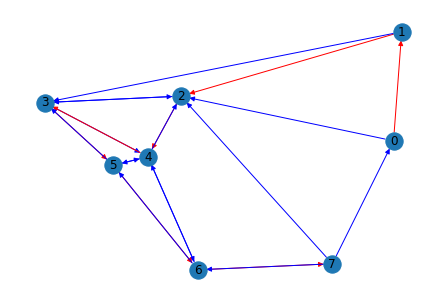

In [129]:
edges = graph.edges()
colors = [graph[u][v]['color'] for u,v in edges]
nx.draw(graph, layout, edge_color=colors, with_labels = True)
    